In [1]:
import pandas as pd

# read synthetic data
data = pd.read_csv('datasets/real_life_regressor.csv')
data.head()

,h_1,h_2,x_1,x_2,x_3,y
0,-0.507907,-0.426783,-0.348796,-0.156770,-0.197266,0
1,0.208406,0.579240,-0.049915,-0.135873,-0.057563,1
2,-0.408581,0.486722,-0.734377,-0.359439,-0.515557,1
3,-0.686362,0.810403,-0.127156,0.049691,-0.722663,1
4,-0.270678,0.418167,-0.747838,-0.360587,-0.447434,1


In [2]:
from sklearn.decomposition import FactorAnalysis, PCA, FastICA
from sklearn.manifold import LocallyLinearEmbedding

# use FA to extract features from the variables and create a dataframe for it
fa_latent = FactorAnalysis(n_components=2, random_state=0).fit_transform(data[['x_1', 'x_2', 'x_3']])
fa_latent = pd.DataFrame(fa_latent, columns=['z_1', 'z_2'])
fa_latent = pd.concat([data, fa_latent], axis=1)

# use PCA to extract features from the variables and create a dataframe for it
pca_latent = PCA(n_components=2, random_state=0).fit_transform(data[['x_1', 'x_2', 'x_3']])
pca_latent = pd.DataFrame(pca_latent, columns=['z_1', 'z_2'])
pca_latent = pd.concat([data, pca_latent], axis=1)

# use ICA to extract features from the variables and create a dataframe for it
ica_latent = FastICA(n_components=2, random_state=0).fit_transform(data[['x_1', 'x_2', 'x_3']])
ica_latent = pd.DataFrame(ica_latent, columns=['z_1', 'z_2'])
ica_latent = pd.concat([data, ica_latent], axis=1)

# use LLE to extract features from the variables and create a dataframe for it
lle_latent = LocallyLinearEmbedding(n_components=2, random_state=0).fit_transform(data[['x_1', 'x_2', 'x_3']])
lle_latent = pd.DataFrame(lle_latent, columns=['z_1', 'z_2'])
lle_latent = pd.concat([data, lle_latent], axis=1)

fa_latent.head()

,h_1,h_2,x_1,x_2,x_3,y,z_1,z_2
0,-0.507907,-0.426783,-0.348796,-0.156770,-0.197266,0,-0.776260,-0.073642
1,0.208406,0.579240,-0.049915,-0.135873,-0.057563,1,-0.290319,-0.316002
2,-0.408581,0.486722,-0.734377,-0.359439,-0.515557,1,-1.652753,-0.252512
3,-0.686362,0.810403,-0.127156,0.049691,-0.722663,1,-0.580926,2.278651
4,-0.270678,0.418167,-0.747838,-0.360587,-0.447434,1,-1.633168,-0.433425


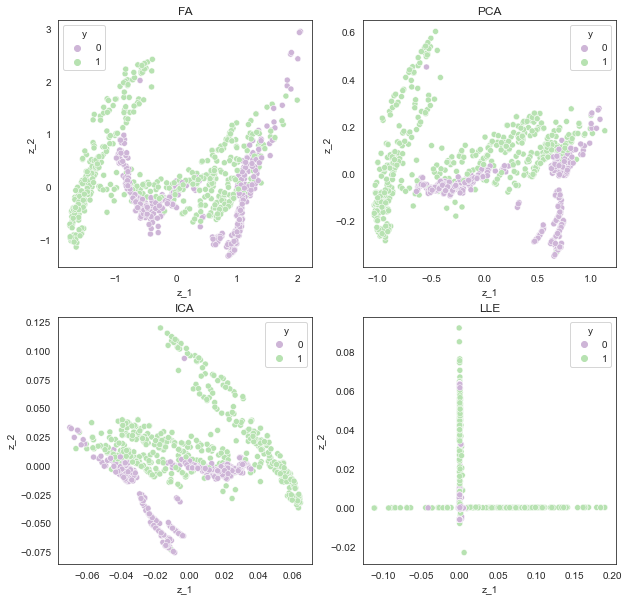

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# style for the plots
sns.set_style('white')
sns.set_palette('PRGn', 2)
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# plot the data for latent variables
for df, title, index in zip([fa_latent, pca_latent, ica_latent, lle_latent], ['FA', 'PCA', 'ICA', 'LLE'],
                            [(0, 0), (0, 1), (1, 0), (1, 1)]):
    sns.scatterplot(data=df, x='z_1', y='z_2', hue='y', ax=axs[index])
    axs[index].set_title(title)

plt.savefig('figures/methods_visualization.png', dpi=300)
plt.show()

In [4]:
from representation_learning.metrics import multiple_correlation

print(f"fa: {multiple_correlation(fa_latent, 'y', ['z_1', 'z_2']):.2f}, "
      f"pca: {multiple_correlation(pca_latent, 'y', ['z_1', 'z_2']):.2f}, "
      f"ica: {multiple_correlation(ica_latent, 'y', ['z_1', 'z_2']):.2f}, "
      f"lle: {multiple_correlation(lle_latent, 'y', ['z_1', 'z_2']):.2f}" )

fa: 0.18, pca: 0.29, ica: 0.29, lle: 0.04


In [5]:
from representation_learning.metrics import mutual_information_gap

print(f"fa: {mutual_information_gap(fa_latent, ['h_1', 'h_2'], ['z_1', 'z_2']):.2f}, "
      f"pca: {mutual_information_gap(pca_latent, ['h_1', 'h_2'], ['z_1', 'z_2']):.2f}, "
      f"ica: {mutual_information_gap(ica_latent, ['h_1', 'h_2'], ['z_1', 'z_2']):.2f}, "
      f"lle: {mutual_information_gap(lle_latent, ['h_1', 'h_2'], ['z_1', 'z_2']):.2f}" )

fa: 0.50, pca: 0.47, ica: 0.44, lle: 0.20


In [6]:
from representation_learning.metrics import inverted_kruskals_stress
stresses = [inverted_kruskals_stress(data, ['x_1', 'x_2', 'x_3'], ['z_1', 'z_2'], 0.001)
            for data in [fa_latent, pca_latent, ica_latent, lle_latent]]

Search Range: [0.20000, 5.00000]


  0%|          | 0/10 [00:00<?, ?it/s]

Inverted Stress: 0.506, New Window Size: 1.06667
Search Range: [0.20000, 1.26667]


  0%|          | 0/10 [00:00<?, ?it/s]

Inverted Stress: 0.740, New Window Size: 0.23704
Search Range: [0.43704, 0.67407]


  0%|          | 0/10 [00:00<?, ?it/s]

Inverted Stress: 0.755, New Window Size: 0.05267
Search Range: [0.48971, 0.54239]


  0%|          | 0/10 [00:00<?, ?it/s]

Inverted Stress: 0.756, New Window Size: 0.01171
Search Range: [0.50142, 0.51312]


  0%|          | 0/10 [00:00<?, ?it/s]

Inverted Stress: 0.756, New Window Size: 0.00260
Search Range: [0.50662, 0.50922]


  0%|          | 0/10 [00:00<?, ?it/s]

Inverted Stress: 0.756, New Window Size: 0.00058
Search Range: [0.20000, 5.00000]


  0%|          | 0/10 [00:00<?, ?it/s]

Inverted Stress: 0.743, New Window Size: 1.06667
Search Range: [0.73333, 1.80000]


  0%|          | 0/10 [00:00<?, ?it/s]

Inverted Stress: 0.950, New Window Size: 0.23704
Search Range: [0.85185, 1.08889]


  0%|          | 0/10 [00:00<?, ?it/s]

Inverted Stress: 0.968, New Window Size: 0.05267
Search Range: [0.98354, 1.03621]


  0%|          | 0/10 [00:00<?, ?it/s]

Inverted Stress: 0.968, New Window Size: 0.01171
Search Range: [1.00110, 1.01280]


  0%|          | 0/10 [00:00<?, ?it/s]

Inverted Stress: 0.968, New Window Size: 0.00260
Search Range: [1.00760, 1.01020]


  0%|          | 0/10 [00:00<?, ?it/s]

Inverted Stress: 0.968, New Window Size: 0.00058
Search Range: [0.20000, 5.00000]


  0%|          | 0/10 [00:00<?, ?it/s]

Inverted Stress: 0.316, New Window Size: 5.33333
Search Range: [4.46667, 9.80000]


  0%|          | 0/10 [00:00<?, ?it/s]

Inverted Stress: 0.572, New Window Size: 5.92593
Search Range: [9.20741, 15.13333]


  0%|          | 0/10 [00:00<?, ?it/s]

Inverted Stress: 0.661, New Window Size: 1.31687
Search Range: [13.15802, 14.47490]


  0%|          | 0/10 [00:00<?, ?it/s]

Inverted Stress: 0.661, New Window Size: 0.29264
Search Range: [13.45066, 13.74330]


  0%|          | 0/10 [00:00<?, ?it/s]

Inverted Stress: 0.661, New Window Size: 0.06503
Search Range: [13.51569, 13.58072]


  0%|          | 0/10 [00:00<?, ?it/s]

Inverted Stress: 0.661, New Window Size: 0.01445
Search Range: [13.55905, 13.57350]


  0%|          | 0/10 [00:00<?, ?it/s]

Inverted Stress: 0.661, New Window Size: 0.00321
Search Range: [13.56226, 13.56547]


  0%|          | 0/10 [00:00<?, ?it/s]

Inverted Stress: 0.661, New Window Size: 0.00071
Search Range: [0.20000, 5.00000]


  0%|          | 0/10 [00:00<?, ?it/s]

Inverted Stress: 0.212, New Window Size: 5.33333
Search Range: [4.46667, 9.80000]


  0%|          | 0/10 [00:00<?, ?it/s]

Inverted Stress: 0.334, New Window Size: 5.92593
Search Range: [9.20741, 15.13333]


  0%|          | 0/10 [00:00<?, ?it/s]

Inverted Stress: 0.349, New Window Size: 1.31687
Search Range: [11.18272, 12.49959]


  0%|          | 0/10 [00:00<?, ?it/s]

Inverted Stress: 0.349, New Window Size: 0.29264
Search Range: [11.91431, 12.20695]


  0%|          | 0/10 [00:00<?, ?it/s]

Inverted Stress: 0.349, New Window Size: 0.06503
Search Range: [12.01186, 12.07689]


  0%|          | 0/10 [00:00<?, ?it/s]

Inverted Stress: 0.349, New Window Size: 0.01445
Search Range: [12.03353, 12.04799]


  0%|          | 0/10 [00:00<?, ?it/s]

Inverted Stress: 0.349, New Window Size: 0.00321
Search Range: [12.04156, 12.04477]


  0%|          | 0/10 [00:00<?, ?it/s]

Inverted Stress: 0.349, New Window Size: 0.00071


In [7]:
print(f"fa: {stresses[0]:.2f}, "
      f"pca: {stresses[1]:.2f}, "
      f"ica: {stresses[2]:.2f}, "
      f"lle: {stresses[3]:.2f}" )

fa: 0.76, pca: 0.97, ica: 0.66, lle: 0.35
